**Diamonds**
======
Context
--------
Этот классический набор данных содержит цены и прочие атрибуты почти 54,000 бриллиантов. Это отличный набор для начинающих учиться работать с анализом данных и визуализацией.
Content
-------
price - цена в долларах США ($326--$18,823)

carat - каратный вес алмаза (0.2--5.01)

cut - качество огранки (удовлетворительное, хорошее, очень хорошее, Премиум, идеал)

color - цвет бриллианта, от J (худший) до D (лучшее)

clarity - четкость алмаза (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))

х - Длина в мм (0--10.74)

y - ширина в мм (0--58.9)

z - глубина в мм (0--31.8)

depth - общая глубина процентах = z / mean(x, y) = 2 * z / (x + y) (43--79)

table - Ширина верхней части алмаза относительно широкой точки (43--95)

Набор данных содержит 53940 выборок и 11 признаков, предназначенных для прогнозирования цены бриллианта в зависимости от признаков.

In [1]:
#numpy – матричные операции
#matplotlib – научная графика
#pandas – таблицы (DataFrame) для анализа данных
#scikit-learn – алгоритмы машинного обучения

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Считываем базу данных из файла
url = 'https://raw.githubusercontent.com/EkaterinaZubareva/MachineLearning/master/diamonds.csv'
data = pd.read_csv(url, sep = ',', engine='python')

In [3]:
type(data)


pandas.core.frame.DataFrame

In [4]:
#вывод данных
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
#вывести размерность таблицыы
#выывести названия всех столбцов 
print(data.shape)
print(data.columns)

(53940, 11)
Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


таблица содержит 53940 строк и 11 столбцов

In [6]:
data.index

RangeIndex(start=0, stop=53940, step=1)

In [7]:
#Посмотрим общую информацию по набору данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.9+ MB


In [8]:
#Статистические характеристики данных по количественным признакам:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


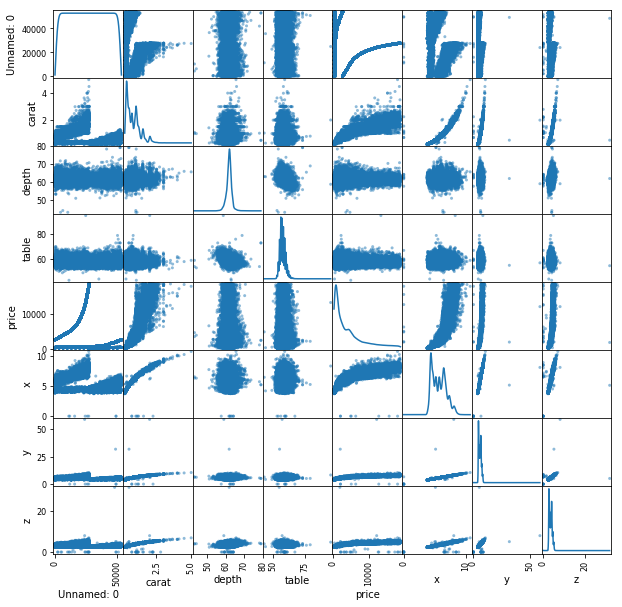

In [9]:
import matplotlib.pyplot as plt
pd.tools.plotting.scatter_matrix(data,alpha=0.5,figsize=(10,10),diagonal="kde")
pass

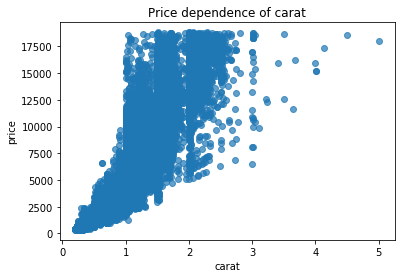

In [10]:
plt.plot(data['carat'], data['price'], 'o', alpha = 0.7)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Price dependence of carat')
pass

Готовим данные:
=======

In [12]:
#Разделим имеющиеся столбцы на категориальные и на числовые.
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['cut', 'color', 'clarity']
['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [13]:
#Для каждого категориального признака выведем все возможные значения:
for c in categorical_columns:
    print(c, data[c].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [14]:
#Для каждого числовые признака выведем все возможные значения:
for c in numerical_columns:
    print(c, data[c].unique())

Unnamed: 0 [    1     2     3 ..., 53938 53939 53940]
carat [ 0.23  0.21  0.29  0.31  0.24  0.26  0.22  0.3   0.2   0.32  0.33  0.25
  0.35  0.42  0.28  0.38  0.7   0.86  0.71  0.78  0.96  0.73  0.8   0.75
  0.74  0.81  0.59  0.9   0.91  0.61  0.77  0.63  0.76  0.64  0.72  0.79
  0.58  1.17  0.6   0.83  0.54  0.98  0.52  1.01  0.53  0.84  0.51  1.05
  0.55  0.87  1.    0.57  0.82  1.04  0.93  1.2   0.99  0.34  0.43  0.36
  0.95  0.89  1.02  0.97  0.56  0.85  0.92  1.27  0.66  1.12  0.68  1.03
  0.62  1.22  1.08  0.88  0.5   1.19  0.39  0.65  1.24  1.5   0.27  0.41
  1.13  1.06  0.69  0.4   1.14  0.94  1.29  1.52  1.16  1.21  1.23  1.09
  0.67  1.11  1.1   1.18  1.15  1.25  1.07  1.28  1.51  0.37  1.31  1.26
  1.39  1.44  1.35  1.3   1.32  1.41  1.36  1.45  1.34  1.58  1.54  1.38
  1.33  1.74  1.64  1.47  1.4   1.55  1.95  2.    1.37  1.83  1.62  1.57
  1.69  2.06  1.72  1.66  2.14  1.49  1.46  2.15  1.96  2.22  1.7   1.53
  1.85  2.01  2.27  1.68  1.56  1.81  1.65  1.82  2.03  1.73  1.

Обрабатываем пропущенные значения:
=================

In [15]:
#найдем средние значения всех количественных признаков:
data.median(axis = 0)

Unnamed: 0    26970.50
carat             0.70
depth            61.80
table            57.00
price          2401.00
x                 5.70
y                 5.71
z                 3.53
dtype: float64

In [16]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [17]:
data[numerical_columns].count(axis = 0)

Unnamed: 0    53940
carat         53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [18]:
data[categorical_columns].count(axis = 0)

cut        53940
color      53940
clarity    53940
dtype: int64

Векторизация
============

In [19]:
nonbinary_columns = categorical_columns
print(nonbinary_columns)

['cut', 'color', 'clarity']


In [20]:

data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [22]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [23]:
#Векторизуем категориальные признаки:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


Нормализация количественных признаков:
================

In [24]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [25]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,1.448600e-17,3.774170e-14,5.528923e-13,-3.621533e-14,-6.602421e-15,1.177763e-13,8.638663e-14,-2.522116e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732003e+00,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-8.660013e-01,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,0.000000e+00,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,8.660013e-01,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.052356e-01,7.103118e-01
max,1.732003e+00,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.654922e+01,4.004720e+01


X и Y
====

In [26]:

X = data[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = data['price']
feature_names = X.columns

In [27]:
type(feature_names)

pandas.core.indexes.base.Index

In [28]:
print(X.shape)
print(y.shape)
N, d = X.shape

(53940, 6)
(53940,)


In [29]:
type(X)

pandas.core.frame.DataFrame

In [30]:
type(y)

pandas.core.series.Series

In [31]:
#разобьем данные на обучающую/тестовую выборки в отношении 70%:30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

37758 16182


In [32]:
37758+16182

53940

KNN
====

Метод ближайших соседей. При k=5:

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [34]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [35]:
# применяем метод predict, считаем среднюю ошибку
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train, err_test)

0.0892971122257 0.136328069941


Получили ошибку на обучающей выборке - 8.92% , а на тестовой - 13,63 %

Подбор параметров
====

In [36]:
#Найдем такое значение параметра k, при котором значение ошибки будет минимальным.

from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15]
knn_r = KNeighborsRegressor()
grid = GridSearchCV(knn_r, param_grid = {'n_neighbors': nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.12409000249 15


In [37]:
#Посчитаем ошибки на тестовой и обучающей выборке при подобранном параметре k=15
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train, err_test)

0.108266606764 0.123210685996


Получили ошибку на обучающей выборке - 10.82%, а на тестовой - 12,32%
Наблюдаем переобучение
Часть 2
-------

In [53]:
#Обучаем регрессор
#Проведем задачу классификации 12 различных форм зданий с помощью нейронных сетей Разобъем данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
N_test, _ = X_test.shape

In [54]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [55]:
X_test

,carat,depth,table,x,y,z
1388,0.24,62.1,56.0,3.97,4.00,2.47
50052,0.58,60.0,57.0,5.44,5.42,3.26
41645,0.40,62.1,55.0,4.76,4.74,2.95
42377,0.43,60.8,57.0,4.92,4.89,2.98
17244,1.55,62.3,55.0,7.44,7.37,4.61
1608,1.00,55.4,62.0,6.63,6.59,3.66
46398,0.51,60.2,56.0,5.22,5.24,3.15
45493,0.52,62.0,56.0,5.17,5.19,3.21
49385,0.62,60.0,59.0,5.58,5.56,3.34
10460,1.14,60.3,57.0,6.79,6.85,4.11


In [56]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.361216256533 0.370907523575


In [57]:
mlp_model = MLPRegressor(hidden_layer_sizes = (6, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
#Проверка качества регрессора
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

1.0 1.00022953961


Подбор параметра alpha и числа нейронов.
========================

In [59]:
alpha_arr = np.logspace(-4, 5, 25)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPRegressor(alpha = alpha, hidden_layer_sizes = (6,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))

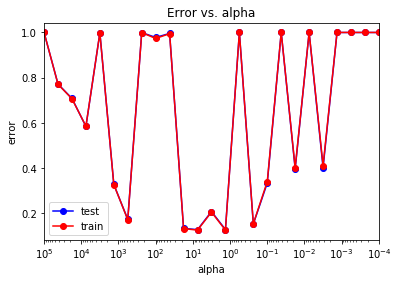

In [60]:

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [61]:

print(alpha_arr)

[  1.00000000e-04   2.37137371e-04   5.62341325e-04   1.33352143e-03
   3.16227766e-03   7.49894209e-03   1.77827941e-02   4.21696503e-02
   1.00000000e-01   2.37137371e-01   5.62341325e-01   1.33352143e+00
   3.16227766e+00   7.49894209e+00   1.77827941e+01   4.21696503e+01
   1.00000000e+02   2.37137371e+02   5.62341325e+02   1.33352143e+03
   3.16227766e+03   7.49894209e+03   1.77827941e+04   4.21696503e+04
   1.00000000e+05]


In [62]:
#Минимальное значение ошибки
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.127963788387 0.125883272467


In [63]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

7.49894209332


Найдем оптимальное количество нейронов
========

In [66]:
neurons_arr = np.arange(1, 100)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPRegressor(hidden_layer_sizes = (neurons, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))

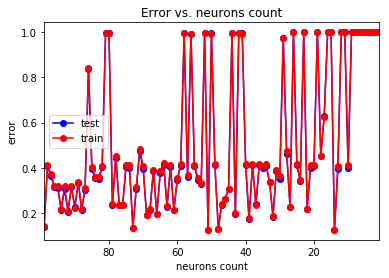

In [67]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'test')
plt.plot(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

In [68]:

mlp_model = MLPRegressor(hidden_layer_sizes = (11, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

1.0 1.00022953961


In [69]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.124146765045 0.124259670725


In [70]:
#Оптимальное число нейронов
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)
neurons_opt = neurons_opt[0]

[51]


Часть 3
=====
Random forests
========

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [72]:

from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators = 5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

1.0 1.00022953961


In [74]:
tree_arr = np.arange(1, 20, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestRegressor(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    train_err.append(1 - rf.score(X_train, y_train))
    test_err.append(1 - rf.score(X_test, y_test)) 
    oob_err.append(1 - rf.oob_score_)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


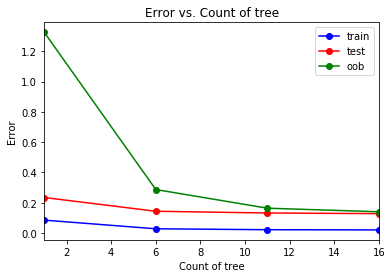

In [75]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [76]:

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0208421187327
Минимальная ошибка на тестовой выборке:  0.128327762288


In [77]:
#Оптимальное количество деревьев:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[16]


AdaBoost
====

In [78]:
#Обучаем регрессор вида Ada Boost. Число регрессоров = 5.
ab = ensemble.AdaBoostRegressor(n_estimators = 5)
ab.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=5, random_state=None)

In [79]:
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.10848385793
Ошибка на тестовой выборке:  0.121382616976


In [80]:
#Графики зависимости ошибки на тестовой и обучающей выборках от кол-ва деревьев
estimator_arr = np.arange(1, 200, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostRegressor(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))

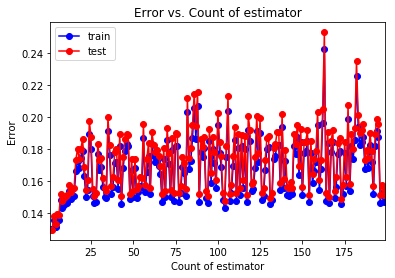

In [81]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [82]:
#Оптимальное число классификаторов
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[]


Gradient boosted trees
============

In [83]:
#Обучаем Gradient boosted trees регрессор с количеством деревьев равным 5.
gbt = ensemble.GradientBoostingRegressor(n_estimators = 5)
gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [86]:
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.10848385793
Ошибка на тестовой выборке:  0.121382616976


In [87]:
tree_arr = np.arange(1, 100, 5)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingRegressor(n_estimators = tree)
    gbt.fit(X_train, y_train)
    train_err.append(1 - gbt.score(X_train, y_train))
    test_err.append(1 - gbt.score(X_test, y_test))

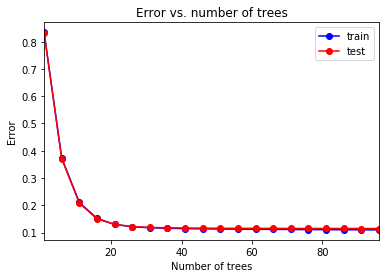

In [88]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

In [89]:
#Минимальные значения ошибок на обучающей и тестовой выборке:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.109856233104
Минимальная ошибка на тестовой выборке:  0.114942992618


In [90]:
#Оптимальное количество деревьев:

trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[96]


Extremely Randomized Trees
=======

In [91]:

ert = ensemble.ExtraTreesRegressor(n_estimators = 10)
ert.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
#ошибки на тестовой и обучающей выборках
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train)
print(err_test)

0.10848385793
0.121382616976


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


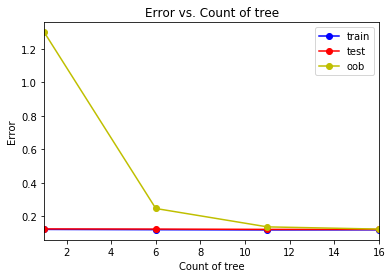

In [93]:
#переобучение
#график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев
#oob_score = True - определяет использовать ли out-of-bag объекты для оценки
#bootstrap = True - определяет применять ли бустрэп для построения дерева
#как и RF будем регулировать высоту деревьев
tree_arr = np.arange(1, 20, 5)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesRegressor(n_estimators = tree, oob_score=True, bootstrap=True, max_depth=7)
    ert.fit(X_train, y_train)
    train_err.append(1 - ert.score(X_train, y_train))
    test_err.append(1 - ert.score(X_test, y_test)) 
    oob_err.append(1 - ert.oob_score_)
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [94]:
#в данном случае переобучение не наблюдается
#Минимальные значения ошибок на обучающей и тестовой выборке
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.117981073412
0.12088902169


In [95]:
#Оптимальное число деревьев
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[16]



PCA
===

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [108]:

pca_x = pca.transform(X)

In [109]:
pca_x.shape

(53940, 6)

In [110]:
type(pca)

sklearn.decomposition.pca.PCA

In [111]:
pca.explained_variance_

array([ 5.49789503,  3.01841444,  1.74994822,  0.03939692,  0.01678468,
        0.00842894])

In [112]:
pca.explained_variance_ratio_

array([ 0.53218131,  0.29217432,  0.16939024,  0.00381351,  0.00162471,
        0.0008159 ])

In [116]:
#Разбиваем данные после применения PCA на обучающую и тестовую выборки. Тестовая выборка содержит 33% данных.
X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)

In [119]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators = 5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [120]:
#Проверим качество регрессора 

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.90373280943
Ошибка на тестовой выборке:  0.999550587046


In [123]:
components_arr = np.arange(1, 16, 1)
test_err = []
train_err = []
oob_err = []
for number in components_arr:
    pca = PCA(n_components = 6)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)
    rf = ensemble.RandomForestRegressor(n_estimators = 2, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\en

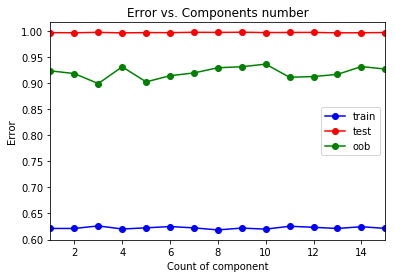

In [124]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

In [125]:
#Получили график зависимости ошибок от количества компонент.

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.618473117684
Минимальная ошибка на тестовой выборке:  0.996123813269


Получили переобучение

In [126]:
#оптимальное число компонент
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[4]


In [127]:
pca.components_#главные компоненты

array([[  7.65018302e-02,  -2.54274823e-01,   9.19269721e-01,
          1.92972044e-01,   1.91392636e-01,   1.02789173e-01],
       [  2.44534377e-01,   2.27776493e-01,  -2.44498901e-01,
          5.81865569e-01,   5.91649044e-01,   3.74065454e-01],
       [ -2.54669892e-02,   9.38175701e-01,   3.08432188e-01,
         -1.03986114e-01,  -1.14603972e-01,  -1.00095197e-02],
       [ -2.29995911e-01,   3.23382683e-02,   5.10490498e-03,
         -4.49407599e-01,   7.71111964e-01,  -3.86586609e-01],
       [ -4.05586468e-01,  -4.01812484e-02,   2.58836219e-03,
         -3.99143156e-01,   5.87741761e-02,   8.19212257e-01],
       [  8.46347056e-01,  -2.50647580e-02,  -5.41950689e-04,
         -5.02094303e-01,   4.60231687e-02,   1.69856716e-01]])

In [131]:

#найдём "оптимальное" кол-во гл.комп.
#Выбираем нужное количество s главных компонент так, чтобы объясненная дисперсия была
#не меньше некоторого заданного уровня α (например, α = 0.95)
#m_pres 175страница
arr_comp=[]
pca_global = PCA( n_components = 6 ,svd_solver='full')
pca_global.fit(X)
result_global=pca_global.transform(X)
sum=0.0
for gl in pca_global.explained_variance_:
    sum+=gl

comp_arr = np.arange(2,7)
for opt in comp_arr:
    pca_comp = PCA( n_components = opt ,svd_solver='full')
    pca_comp.fit(X)
    result_comp=pca_comp.transform(X)
    sum_comp=0.0
    for gl in pca_comp.explained_variance_:
        sum_comp+=gl
    if (sum_comp/sum)>0.95: arr_comp.append(opt)

In [132]:

arr_comp

[3, 4, 5, 6]

In [133]:
ncomp_opt=arr_comp[0]
pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
pca_opt.fit(X)
result_opt=pca_opt.transform(X)
X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)

In [134]:
from sklearn import ensemble

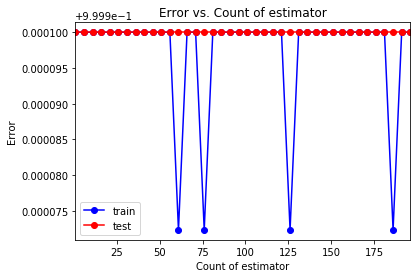

In [136]:
#графики зависимости ошибки от кол.деревьев(adaboost). Кол-во комп. = ncomp_opt
estimator_arr = np.arange(1, 200, 5)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostRegressor(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass


In [137]:
#Минимальные значения ошибок на обучающей и тестовой выборке

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.999972329063
1.0


In [138]:
#Оптимальное число классификаторов 
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
 181 186 191 196]


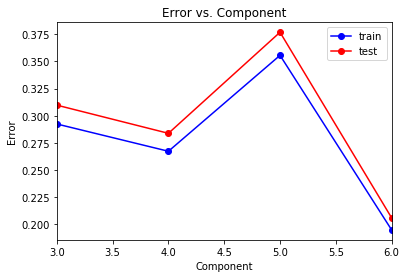

In [139]:
#кол-во главных компонент = формула ml_pres 175page
test_err = []
train_err = []
for ncomp_opt in arr_comp:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(X1)
    result_opt=pca_opt.transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)
    ab = ensemble.AdaBoostRegressor(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(arr_comp, train_err, 'b-o', label = 'train')
plt.plot(arr_comp, test_err, 'r-o', label = 'test')
plt.xlim([np.min(arr_comp), np.max(arr_comp)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [140]:
#Минимальные значения ошибок на обучающей и тестовой выборке
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.194979740064
0.206084201765


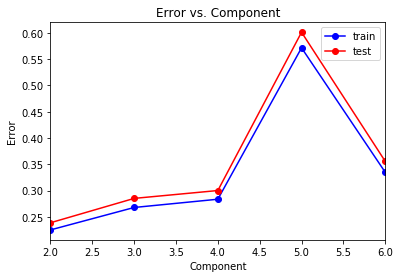

In [141]:
test_err = []
train_err = []
for ncomp_opt in comp_arr:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(X1)
    result_opt=pca_opt.transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)
    ab = ensemble.AdaBoostRegressor(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(comp_arr, train_err, 'b-o', label = 'train')
plt.plot(comp_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(comp_arr), np.max(comp_arr)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [142]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.225218735763
0.238829953273


In [143]:
#наилучшее значение количества используемых главных компонент
print(comp_arr[test_err == min_test_err])

[2]
